In [2]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import numpy as np
#pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
# for special words you don't want to lemmatize
nolem = ['sas','python']

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [2]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import numpy as np
#pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
# for special words you don't want to lemmatize
nolem = ['sas','python']

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [3]:
# set up working file
file = '/Users/Quantum/Downloads/Tips Project 2019.xlsx'

# load excel file
tips = pd.ExcelFile(file)

# get excel names excluding the summary sheet and convert year into number list
tipsyear=tips.sheet_names[1:]
#tipsyear = list(map(int, tipsyear))

In [4]:
# wrap up together
tipsdf=pd.DataFrame()
for year in tipsyear:
    tipdf=tips.parse(year, names=['TIPS','label'])
    tipdf['year'] = year
    tipsdf=tipsdf.append(tipdf)
tipsdf=tipsdf.reset_index(drop=True)

# Clean Text with ntlk package

## Step by step text cleaning function

In [5]:
def clean_text(text, join=False, stem='lemmatize'):
    # lower case and remove punctuation, here word is char so need '' to join these char back
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    
    # break down to tokens (single word)
    tokens = re.split('\W+', text)
    
    # special words no lemmatize, and remove stop words
    # elif list comprehension: [if-1 condition_1 else_2 for_statement <condition_2>]
    
    if stem == 'lemmatize':
        if join == True:
            text = ' '.join([word if word in nolem else wn.lemmatize(word) for word in tokens if word not in stopwords ])
        else:
            text = [word if word in nolem else wn.lemmatize(word) for word in tokens if word not in stopwords ]
    elif stem == 'stem':
        if join == True:
            text = ' '.join([word if word in nolem else ps.stem(word) for word in tokens if word not in stopwords ])
        else:
            text = [word if word in nolem else ps.stem(word) for word in tokens if word not in stopwords ]
    #nostop = [word for word in tokens if word not in stopwords]
    #text = [wn.lemmatize(word) if word not in nolem else word for word in nostop]
    #text=[]
    #for word in tokens:
    #    if word in nolem:
    #        text.append(word)
    #    elif word not in stopwords:
    #        text.append(wn.lemmatize(word))
    return text

# Apply CountVectorizer

In [6]:
'''
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(tipsdf['TIPS'])
#print(X_counts.shape)
#print(count_vect.get_feature_names())
#X_counts

# Vectorizers output sparse matrices
X_counts_df=pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()
#X_counts_df.head()
'''

"\nfrom sklearn.feature_extraction.text import CountVectorizer\n\ncount_vect = CountVectorizer(analyzer=clean_text)\nX_counts = count_vect.fit_transform(tipsdf['TIPS'])\n#print(X_counts.shape)\n#print(count_vect.get_feature_names())\n#X_counts\n\n# Vectorizers output sparse matrices\nX_counts_df=pd.DataFrame(X_counts.toarray())\nX_counts_df.columns = count_vect.get_feature_names()\n#X_counts_df.head()\n"

# Apply CountVectorizer (w/ N-Grams)

In [7]:
'''
ngram_vect = CountVectorizer(ngram_range=(1,2))
X_counts_ngram=ngram_vect.fit_transform(tipsdf['TIPS_cleaned_text'])
#print(X_counts_ngram.shape)
#print(ngram_vect.get_feature_names())
X_counts_ngram_df=pd.DataFrame(X_counts_ngram.toarray())
X_counts_ngram_df.columns=ngram_vect.get_feature_names()
#X_counts_ngram_df.head()
'''

"\nngram_vect = CountVectorizer(ngram_range=(1,2))\nX_counts_ngram=ngram_vect.fit_transform(tipsdf['TIPS_cleaned_text'])\n#print(X_counts_ngram.shape)\n#print(ngram_vect.get_feature_names())\nX_counts_ngram_df=pd.DataFrame(X_counts_ngram.toarray())\nX_counts_ngram_df.columns=ngram_vect.get_feature_names()\n#X_counts_ngram_df.head()\n"

# Apply CountVectorizer TF-IDF

In [8]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(tipsdf['TIPS'])
#print(X_tfidf.shape)
#print(tfidf_vect.get_feature_names())
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
#X_tfidf_df.head()
'''

"\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\ntfidf_vect = TfidfVectorizer(analyzer=clean_text)\nX_tfidf = tfidf_vect.fit_transform(tipsdf['TIPS'])\n#print(X_tfidf.shape)\n#print(tfidf_vect.get_feature_names())\nX_tfidf_df=pd.DataFrame(X_tfidf.toarray())\nX_tfidf_df.columns=tfidf_vect.get_feature_names()\n#X_tfidf_df.head()\n"

In [9]:
'''
def get_ngrams(text, n ):
    n_grams = nltk.util.ngrams(nltk.tokenize.word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
#tipsdf['TIPS_ngrams'] = tipsdf['TIPS_cleaned'].apply(lambda x: list(nltk.ngrams(x,2)))
'''

"\ndef get_ngrams(text, n ):\n    n_grams = nltk.util.ngrams(nltk.tokenize.word_tokenize(text), n)\n    return [' '.join(grams) for grams in n_grams]\n#tipsdf['TIPS_ngrams'] = tipsdf['TIPS_cleaned'].apply(lambda x: list(nltk.ngrams(x,2)))\n"

# Feature Engineering: Feature Creation

# Create feature for text message length

In [10]:
tipsdf['TIPS_len']=tipsdf['TIPS'].apply(lambda x: len(x) - x.count(' '))

# Create feature for % of text that is punctuation

In [11]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(' ')), 3) * 100
tipsdf['punct%']=tipsdf['TIPS'].apply(lambda x: count_punct(x))

In [12]:
tipsdf.head()

,TIPS,label,year,TIPS_len,punct%
0,Don't be afraid to ask a ton of questions.,Ask Questions,2018,34,5.9
1,"More specific questions yield more helpful information. When you ask for clarification, try to f...",Ask Questions,2018,158,2.5
2,Always ask questions in class. It's easier to clear it up while you're learning it rather than t...,Ask Questions,2018,102,3.9
3,Ask questions! Not only will this help you learn material faster but learning to ask the right q...,Ask Questions,2018,157,1.3
4,Make friends with people around and be a nice person. Enjoy your time at IAA.,Building Relationships/Teamwork,2018,63,3.2


# Evaluate created features

In [13]:
'''
from matplotlib import pyplot

%matplotlib inline
'''

'\nfrom matplotlib import pyplot\n\n%matplotlib inline\n'

In [14]:
'''
bins=np.linspace(0,200,40)

pyplot.hist(tipsdf['TIPS_len'],bins, alpha=0.5, normed=True)
#pyplot.hist(tipsdf[''],bins)
'''

"\nbins=np.linspace(0,200,40)\n\npyplot.hist(tipsdf['TIPS_len'],bins, alpha=0.5, normed=True)\n#pyplot.hist(tipsdf[''],bins)\n"

In [15]:
'''
bins=np.linspace(0,50,40)

pyplot.hist(tipsdf['punct%'],bins, alpha=0.5, normed=True, label='punct%')
pyplot.legend(loc='upper right')
pyplot.show()
'''

"\nbins=np.linspace(0,50,40)\n\npyplot.hist(tipsdf['punct%'],bins, alpha=0.5, normed=True, label='punct%')\npyplot.legend(loc='upper right')\npyplot.show()\n"

# Feature Engineering: Transformations

In [16]:
'''
for i in [1,2,3,4,5]:
    pyplot.hist(tipsdf['punct%']**(1/i), bins=40)
    pyplot.title('Transformation: 1/{}'.format(i))
    pyplot.show()
'''

"\nfor i in [1,2,3,4,5]:\n    pyplot.hist(tipsdf['punct%']**(1/i), bins=40)\n    pyplot.title('Transformation: 1/{}'.format(i))\n    pyplot.show()\n"

# Machine Learning!

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,

In [18]:
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(tipsdf['TIPS'])

In [19]:
X_features=pd.concat([tipsdf['TIPS_len'], tipsdf['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [20]:
from sklearn.model_selection import KFold, cross_val_score

In [21]:
# run in parellel
rf=RandomForestClassifier(n_jobs=-1)
k_fold=KFold(n_splits=10)
cross_val_score(rf, X_features, tipsdf['label'], cv=k_fold, n_jobs=-1)

array([0.5       , 0.64545455, 0.38181818, 0.63636364, 0.46363636,
       0.4       , 0.31818182, 0.50909091, 0.36363636, 0.29090909])

In [22]:
tipsdf['TIPS_cleaned']=tipsdf['TIPS'].apply(lambda x: clean_text(x))

In [23]:
# using set-list to convert a unique list

def ulist(lists):
    return list(set(lists))

tipsdf['TIPS_unique']=tipsdf['TIPS_cleaned'].apply(lambda x: ulist(x))
#tipsdf['TIPS_ngram_unique']=tipsdf['TIPS_ngrams'].apply(lambda x: ulist(x))

In [24]:
# create dataframe of word frequency for each year

yearwordlist={}
for year in tipsyear:
    wordlist= {}
    for tips in tipsdf[tipsdf['year']==year]['TIPS_unique']:
        for word in tips:
            wordlist[word] = wordlist.get(word,0) + 1
    yearwordlist[year]=wordlist
    
yeardf=pd.DataFrame(yearwordlist)

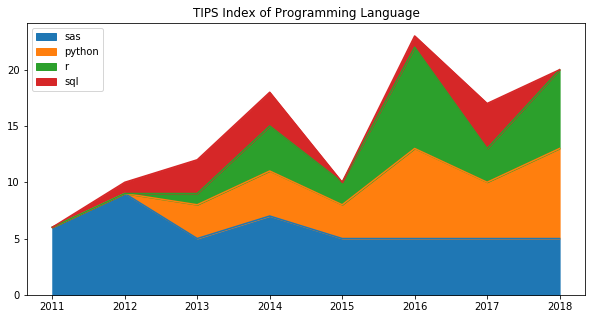

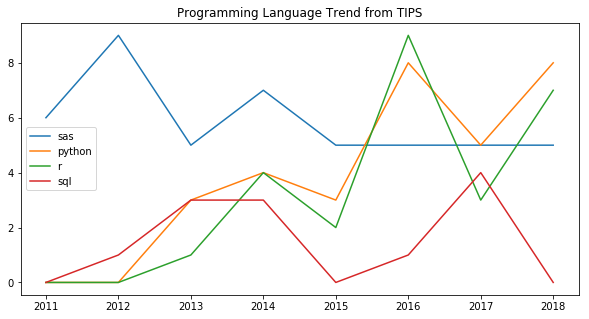

In [26]:
language=yeardf.loc[['sas','python','r','sql']]
language[np.isnan(language)]=0
language = language.T

year_people=[40,40,80,80,80,120,120,120]

# convert index from string to int
language.index=language.index.map(int)

# reindex the language
language = language.reindex([2011,2012,2013,2014,2015,2016,2017,2018])

# area plot of the tips changing
language.plot.area(title='TIPS Index of Programming Language', figsize=(10,5))

# line plot of the tips changing
language.plot(title='Programming Language Trend from TIPS', figsize=(10,5))
#plt.savefig('/Users/Quantum/Downloads/ProgramTrend.png')

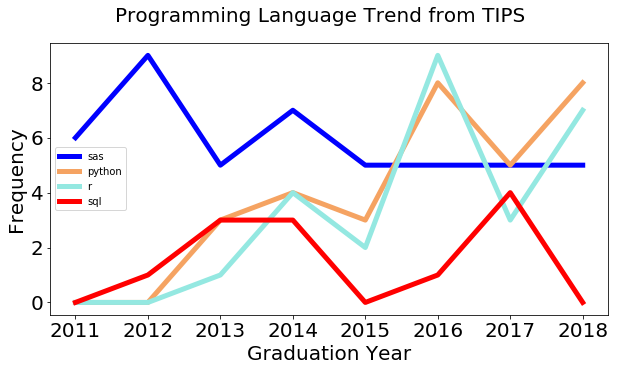

In [47]:
# line plot of the tips changing
language.plot(figsize=(10,5),fontsize=20,color=['blue','#F5A362','#94E8E1','red'],linewidth=5)
plt.suptitle('Programming Language Trend from TIPS', fontsize=20)
plt.xlabel('Graduation Year',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
#plt.show()

plt.savefig('/Users/Quantum/Downloads/ProgramTrend.png')

In [24]:
language1=language.divide(year_people, axis=0)

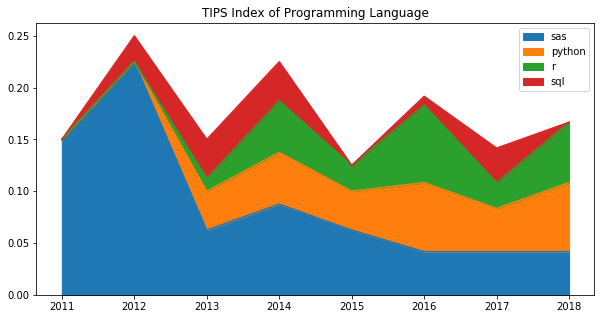

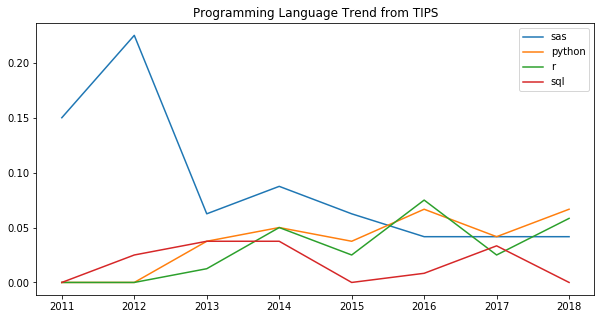

In [25]:
# area plot of the tips changing
language1.plot.area(title='TIPS Index of Programming Language', figsize=(10,5))
language1.plot(title='Programming Language Trend from TIPS', figsize=(10,5))

In [26]:
# library
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
 
# Make data
#data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6], }, index=range(1,6))
 
# We need to transform the data from raw data to percentage (fraction)
#data_perc = data.divide(data.sum(axis=1), axis=0)

# Make the plot
#plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
#plt.legend(loc='upper left')
#plt.margins(0,0)
#plt.title('100 % stacked area chart')
#plt.show()


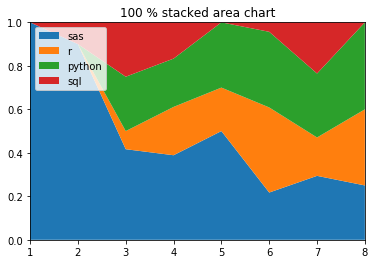

In [59]:
# Make the plot
#plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.stackplot(range(1,9),language_pct['sas'],language_pct['r'],language_pct['python'],language_pct['sql'],labels=['sas','r','python','sql'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

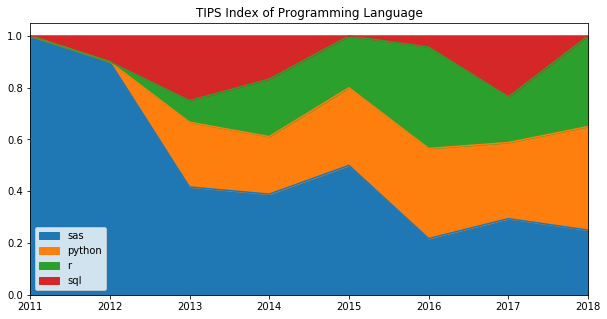

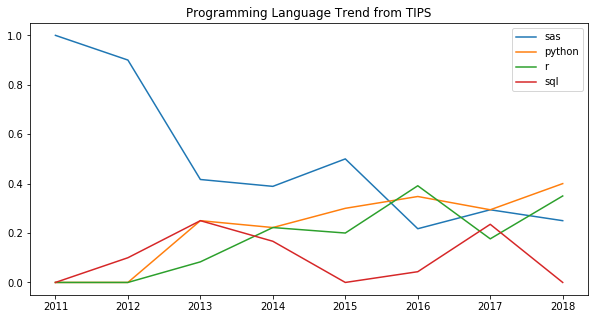

In [60]:
language_pct=language.divide(language.sum(axis=1), axis=0)
language_pct.plot.area(title='TIPS Index of Programming Language', figsize=(10,5))
plt.margins(0,0)
plt.show()
language_pct.plot(title='Programming Language Trend from TIPS', figsize=(10,5))

In [28]:
def get_word_freq(dfseries):
    wordlist= {}
    for wlist in dfseries:
        for word in wlist:
            wordlist[word] = wordlist.get(word,0) + 1
    return(wordlist)

wordlist=get_word_freq(tipsdf['TIPS_unique'])

In [29]:
#[x for x in common_words if x not in stopwords]
#common_words=['arent','youre','youll','1','10','dont','thing','sa','when','i',"you're",'the','them','they','what','during','a','an','all','is','so','are', 'get','this','be', 'for','you','but','your','and','or','to','of','will','in','as', 'on', 'it','-','go','going','day','off','before','doing','often','most','any','these','then',"won't",'was','else','how','me','may','year','would','someone','we','two','had','because','has','might','no','could','here','also','iaa','put','even','well','back','away','too','having',"don't",'throuhg','while', 
#              'by','with','that','at','about','have','if','out','from','can','not', 'do', "don't", 'The','work','much',"it's",'up','really','than','more','did','class','always','just','their','way','some','lot','very','one',"you'll",'something','everything','only','into','first','after','each','getting','other','others','good','keep','many','there','every','want','things'] + ['job','program','help','make','take','3','yourself']

custom_stopwords=['people','','doesnt','home','dislike','do','â','sure','pay',' ','arent', 'youre', 'youll', '1', '10', 'dont', 'thing', 'sa', 'get', '-',
 'go', 'going', 'day', 'often', 'else', 'may', 'year', 'would', 'someone', 'two', 'might', 'could', 'also', 'iaa', 'put', 'even', 'well', 'back', 'away', 'throuhg', 'The', 'work', 'much', 'really',
 'class', 'always', 'way', 'lot', 'one', 'something', 'everything', 'first', 'getting', 'others',
 'good', 'keep', 'many', 'every', 'want', 'things', 'job', 'program', 'help', 'make', 'take', '3'] + ['use','like','spend','say','tell','begin','semester','everyone','important','especially','come','new','institute','summer','become','easy','look','person','let','later','classmates','least','anything','need','around','easier','etc','set','matter','rather','open','seem','great','better','wont','try','know']

wordlist_cleaned = {key: wordlist[key] for key in wordlist if key not in custom_stopwords}

In [30]:
def remove_dict_value(my_dict, x):
    for i in list(my_dict):
        if my_dict[i] == x:
            del my_dict[i]
    return(my_dict)

In [31]:
wordlist_cleaned=remove_dict_value(wordlist_cleaned, 1)

In [32]:
for i in list(wordlist_cleaned):
    if wordlist_cleaned[i] < 11:
        del wordlist_cleaned[i]

In [33]:
#wordfreq=pd.DataFrame({'Count': wordlist_cleaned})
#wordfreq['adjCount']=wordfreq['Count']/wordfreq['Count'].max()
#_=wordfreq['Count'].to_dict()

In [34]:
# output word cloud as picture

_=wordcloud.WordCloud(width=1920, height=1080, max_font_size=None,background_color='white').generate_from_frequencies(wordlist_cleaned).to_file('/Users/Quantum/Downloads/unique.png')

# plot word cloud

#wordcloud=WordCloud(max_font_size=128,background_color='white',colormap=None).generate_from_frequencies(wordlist_cleaned)
#plt.imshow(wordcloud)

In [38]:
ngram_stopwords=['make sure','get know','time get','take advantage','time learn','time get','find something','attention class','learn much','try learn','great way','r python','time go']

#ngram_list_cleaned={key: ngram_list[key] for key in ngram_list if key not in ngram_stopwords}

In [41]:
#ngram_list_cleaned=remove_dict_value(ngram_list_cleaned, 1)

In [42]:
#ngram_list_cleaned={key: ngram_list[key] for key in ngram_list if ngram_list[key] > 10}

In [43]:
#_=WordCloud(width=1920, height=1080,background_color='white').generate_from_frequencies(ngram_list_cleaned).to_file('/Users/Quantum/Downloads/ngram_unique_ge10.png')

In [44]:
worddf=pd.DataFrame({'count':wordlist_cleaned})
worddf=worddf.sort_values(by=['count'])
#ngramdf=pd.DataFrame({'count':ngram_list_cleaned})
#ngramdf=ngramdf.sort_values(by=['count'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b698710>]],
      dtype=object)

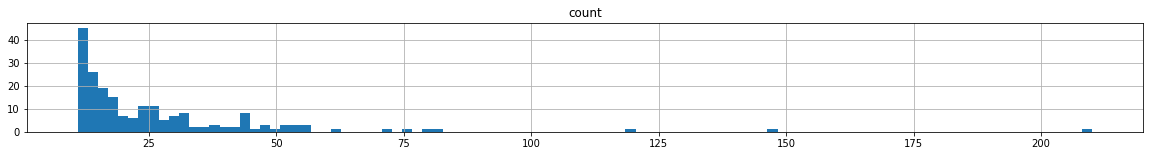

In [45]:
worddf.hist(bins=100, figsize=(20,2))

In [47]:
#ngramdf.hist(bins=100, figsize=(20,2))

# Mongo

In [1]:
import pymongo
from pymongo import MongoClient
import pprint
from bson.son import SON

In [2]:
client = MongoClient()
print(client)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [3]:
db = client.Yelp
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Yelp')


In [4]:
collection = db.review

In [6]:
posts = db.posts

In [9]:
who

MongoClient	 SON	 client	 collection	 db	 json	 lib2to3	 posts	 pprint	 
pymongo	 


In [21]:
db.review.find_one({'stars' : 4})

{'_id': ObjectId('5bb546f235e9995049a63b7e'),
 'review_id': '-STQDcMcBcWX0H_NrsfR2Q',
 'user_id': 'LKcdcMrq2xDzIThSHiZmLg',
 'business_id': 'yEOu75XjwczngvWWlr0M_A',
 'stars': 4,
 'date': '2016-02-17',
 'text': 'Great for the price, only $25 for long hair! Was hesitant about dry cut but it turned out good!',
 'useful': 1,
 'funny': 0,
 'cool': 0}

In [17]:
pprint.pprint(collection.find_one())

{'_id': ObjectId('5bb546f235e9995049a63b77'),
 'business_id': 'pomGBqfbxcqPv14c3XH-ZQ',
 'cool': 0,
 'date': '2012-11-13',
 'funny': 0,
 'review_id': 'dDl8zu1vWPdKGihJrwQbpw',
 'stars': 5,
 'text': 'I love this place! My fiance And I go here atleast once a week. The '
         'portions are huge! Food is amazing. I love their carne asada. They '
         'have great lunch specials... Leticia is super nice and cares about '
         'what you think of her restaurant. You have to try their cheese '
         'enchiladas too the sauce is different And amazing!!!',
 'useful': 0,
 'user_id': 'msQe1u7Z_XuqjGoqhB0J5g'}


In [23]:
for post in db.review.find({"stars": "1"}):
    pprint.pprint(post)

KeyboardInterrupt: 

In [18]:
db.review.find_one()

{'_id': ObjectId('5bb546f235e9995049a63b77'),
 'review_id': 'dDl8zu1vWPdKGihJrwQbpw',
 'user_id': 'msQe1u7Z_XuqjGoqhB0J5g',
 'business_id': 'pomGBqfbxcqPv14c3XH-ZQ',
 'stars': 5,
 'date': '2012-11-13',
 'text': 'I love this place! My fiance And I go here atleast once a week. The portions are huge! Food is amazing. I love their carne asada. They have great lunch specials... Leticia is super nice and cares about what you think of her restaurant. You have to try their cheese enchiladas too the sauce is different And amazing!!!',
 'useful': 0,
 'funny': 0,
 'cool': 0}

In [88]:
print('There are',len(db.business.distinct('business_id')),'businesses in',len(db.business.distinct('city')),'cities')

There are 188593 businesses in 1111 cities


In [92]:
db.business.group(
    {
        key: { business_id: 1 },
        reduce: function ( curr, result ) {
            result.count++;
        },
        initial: { total : 0  }
    }
)

SyntaxError: invalid syntax (<ipython-input-92-322b219f8435>, line 4)

In [95]:
pipeline = [
    {"$unwind": "$city"},
    {"$group": {"_id": "$city",
                "count": {"$sum": 1}}
    },
    {"$sort": SON([("count", -1), ("_id", -1)])}
]

In [1]:
list(db.city.aggregate(
    [
        {
            "$group": {
                "_id": "$city",
                "count": {"$sum": 1},
            }
        }
    ]
)
)

NameError: name 'db' is not defined

In [96]:
pprint.pprint(list(db.business.aggregate(pipeline)))

[{'_id': 'Las Vegas', 'count': 28865},
 {'_id': 'Phoenix', 'count': 18633},
 {'_id': 'Toronto', 'count': 18233},
 {'_id': 'Charlotte', 'count': 9204},
 {'_id': 'Scottsdale', 'count': 8822},
 {'_id': 'Calgary', 'count': 7384},
 {'_id': 'Pittsburgh', 'count': 6804},
 {'_id': 'Mesa', 'count': 6239},
 {'_id': 'Montréal', 'count': 6045},
 {'_id': 'Henderson', 'count': 4815},
 {'_id': 'Tempe', 'count': 4492},
 {'_id': 'Chandler', 'count': 4272},
 {'_id': 'Madison', 'count': 3509},
 {'_id': 'Cleveland', 'count': 3506},
 {'_id': 'Glendale', 'count': 3469},
 {'_id': 'Gilbert', 'count': 3397},
 {'_id': 'Mississauga', 'count': 2954},
 {'_id': 'Peoria', 'count': 1868},
 {'_id': 'Markham', 'count': 1699},
 {'_id': 'North Las Vegas', 'count': 1508},
 {'_id': 'Champaign', 'count': 1243},
 {'_id': 'Scarborough', 'count': 1175},
 {'_id': 'North York', 'count': 1140},
 {'_id': 'Surprise', 'count': 1119},
 {'_id': 'Richmond Hill', 'count': 978},
 {'_id': 'Concord', 'count': 975},
 {'_id': 'Brampton', 'co